# The promise of variational autoencoders
I am fascinated by the possibilities of variational autoencoders. Why? Because it has the capability to abstract a compressed representation of the data, without the need to label the data. Moreover, the variational autoencoder estimates the latent/hidden states according to the leading neuroscientific approach that might explain the structure and function of the brain, starting from the very fact that we exist!

This capability to get a compressed representation out of the original input data has the potential to abstract meaning out of data. Something that we, humans, do every minute of the day. The higher brain functions translate lower-level sensory information (e.g. pixel blob on the retina) to meaning (e.g. it is an apple) and link all the various information around that meaning together. (e.g. I know how it tastes, or if we were talking about stock prices I know it is the company that makes iPhones). Something that we have not been able to replicate in artificial neural networks. Abstracting meaning or knowledge representation is still one of the key challenges in the field of artificial intelligence research. The variational autoencoder approach looks very promising.

So, if you are interested please keep on reading and upvote top right, leave a comment or contact me directly.

For a quick introduction of autoencoders please watch this [video](https://www.youtube.com/watch?v=9zKuYvjFFS8&t=3s), it gives you a good overview, and it inspired me to reproduce the steps taken in this notebook.

In [1]:
# Import all we need

import keras
from keras import layers
from keras.datasets import mnist, fashion_mnist
import numpy as np
from ipywidgets import interact
from keras import backend as K
import seaborn as sns
import matplotlib.pyplot as plt
print ('import completed')


import completed


In [2]:
!kaggle datasets download -d hassan06/nslkdd

Dataset URL: https://www.kaggle.com/datasets/hassan06/nslkdd
License(s): unknown
 87% 12.0M/13.9M [00:01<00:00, 18.5MB/s]
100% 13.9M/13.9M [00:01<00:00, 11.8MB/s]


In [3]:
! unzip /content/nslkdd.zip

Archive:  /content/nslkdd.zip
  inflating: KDDTest+.arff           
  inflating: KDDTest+.txt            
  inflating: KDDTest-21.arff         
  inflating: KDDTest-21.txt          
  inflating: KDDTest1.jpg            
  inflating: KDDTrain+.arff          
  inflating: KDDTrain+.txt           
  inflating: KDDTrain+_20Percent.arff  
  inflating: KDDTrain+_20Percent.txt  
  inflating: KDDTrain1.jpg           
  inflating: index.html              
  inflating: nsl-kdd/KDDTest+.arff   
  inflating: nsl-kdd/KDDTest+.txt    
  inflating: nsl-kdd/KDDTest-21.arff  
  inflating: nsl-kdd/KDDTest-21.txt  
  inflating: nsl-kdd/KDDTest1.jpg    
  inflating: nsl-kdd/KDDTrain+.arff  
  inflating: nsl-kdd/KDDTrain+.txt   
  inflating: nsl-kdd/KDDTrain+_20Percent.arff  
  inflating: nsl-kdd/KDDTrain+_20Percent.txt  
  inflating: nsl-kdd/KDDTrain1.jpg   
  inflating: nsl-kdd/index.html      


In [4]:
import pandas as pd
data=pd.read_csv('/content/nsl-kdd/KDDTest+.txt')
data.head()

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [5]:
data=data.drop(['tcp','private','REJ','neptune'],axis=1)
data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,10.1,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,21
0,0,0,0,0,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,21
1,2,12983,0,0,0,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,21
2,0,20,0,0,0,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,15
3,1,0,15,0,0,0,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,11
4,0,267,14515,0,0,0,0,0,1,0,...,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,21


In [6]:
from sklearn.model_selection import train_test_split
x_train,y_test = train_test_split(data, test_size=0.5, random_state=42)

In [7]:
# Load the data, MNIST is nowadays incorporated in Keras/Tensorflow, so rather easy to use

(x_train, x_train_label), (x_test, x_test_label) = mnist.load_data()
#(x_train, x_train_label), (x_test, x_test_label) = fashion_mnist.load_data() # In case you want to try fashion mnist

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Show the dimensions
print(x_train.shape)
print(x_test.shape)





11490434/11490434 [==============================] - 1s 0us/step
(60000, 784)
(10000, 784)


In [8]:
!pip install tensorflow
import tensorflow as tf

## Training
The variational autoencoder is trained the same way the the regular autoencoder. No need to supply the labels.

In [9]:
original_dim =784
intermediate_dim = 256
latent_dim = 1 #

# autoencoder model
# In this example I used 2 dense neural network layers. You could also use deeper structures or RNN/LSTM or convolutional layers
# The encoder and decoder don't have to be the exact same network structure
input_img = keras.Input(shape=(original_dim,))
encoded = layers.Dense(intermediate_dim, activation='relu')(input_img)
encoded = layers.Dense(latent_dim, activation='relu')(encoded)
# at this point the representation has dimension: latent_dim
decoded = layers.Dense(intermediate_dim, activation='relu')(encoded)
decoded = layers.Dense(original_dim, activation='sigmoid')(decoded)
autoencoder = keras.Model(input_img, decoded, name='autencoder')
print (autoencoder.summary())

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Next the encoder part and decoder model, in order to inspect the inner representation,
# referencing the autoencode layers (the 3 models share there weights)
# This part can be omitted in case you don't want to use the inner latent representation

# encoder model (first part of the autoencoder)
encoder = keras.Model(input_img, encoded, name='encoder')
print (encoder.summary())

# decoder model (second part of the autoencoder) to be able to generate an image from an inner representation,  basically the encoder in reverse.
encoded_input = keras.Input(shape=(latent_dim,))
decoder_layer = autoencoder.layers[-2](encoded_input) # Retrieve the last layers of the autoencoder model
decoder_layer = autoencoder.layers[-1](decoder_layer)
decoder = keras.Model(encoded_input, decoder_layer, name='decoder')
print (decoder.summary())

Model: "autencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
 dense_2 (Dense)             (None, 256)               512       
                                                                 
 dense_3 (Dense)             (None, 784)               201488    
                                                                 
Total params: 403217 (1.54 MB)
Trainable params: 403217 (1.54 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Model: "encoder

In [10]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 8s 25ms/step - loss: 0.2854 - val_loss: 0.2584
Epoch 2/50
235/235 [==============================] - 11s 46ms/step - loss: 0.2552 - val_loss: 0.2505
Epoch 3/50
235/235 [==============================] - 10s 42ms/step - loss: 0.2466 - val_loss: 0.2428
Epoch 4/50
235/235 [==============================] - 12s 52ms/step - loss: 0.2415 - val_loss: 0.2398
Epoch 5/50
235/235 [==============================] - 9s 38ms/step - loss: 0.2395 - val_loss: 0.2383
Epoch 6/50
235/235 [==============================] - 5s 23ms/step - loss: 0.2383 - val_loss: 0.2371
Epoch 7/50
235/235 [==============================] - 5s 21ms/step - loss: 0.2373 - val_loss: 0.2361
Epoch 8/50
235/235 [==============================] - 7s 31ms/step - loss: 0.2364 - val_loss: 0.2353
Epoch 9/50
235/235 [==============================] - 5s 21ms/step - loss: 0.2357 - val_loss: 0.2347
Epoch 10/50
235/235 [==============================] - 5s 23ms/step - loss: 0.2353 - val

In [11]:
reconstructed_test_inputs = autoencoder(x_test)

# Compute the reconstruction error
reconstruction_error = tf.keras.losses.mse(x_test, reconstructed_test_inputs)



In [12]:
x_test.shape

(10000, 784)

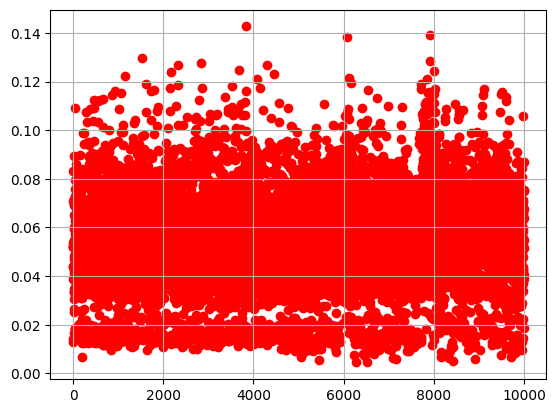

In [13]:
import matplotlib.pyplot as plt
plt.scatter([x for x in range(len(reconstruction_error))], reconstruction_error,color='r')
plt.grid()
plt.show()

In [14]:
# Threshold for anomaly detection
threshold = 0.005

# Detect anomalies
anomalies = tf.where(reconstruction_error > threshold)
print(anomalies)

tf.Tensor(
[[   0]
 [   1]
 [   2]
 ...
 [9997]
 [9998]
 [9999]], shape=(9997, 1), dtype=int64)


In [15]:
!pip install catboost bayesian-optimization

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.8 MB/s eta 0:00:00


In [16]:
!pip install keras-tuner --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.6 MB/s eta 0:00:00


In [17]:
import tensorflow as tf
import kerastuner as kt

<ipython-input-17-09b8a9a0d621>:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [18]:
x_train.shape

(60000, 784)

In [19]:
x_test.shape

(10000, 784)

In [20]:
!pip install bayesian-optimization

In [21]:
from bayes_opt import BayesianOptimization

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner import HyperModel, BayesianOptimization
import numpy as np

# Define the HyperModel class
class AutoencoderHyperModel(HyperModel):
    def build(self, hp):
        input_dim = 784  # Assuming flattened input
        encoding_dim = hp.Int('encoding_dim', min_value=32, max_value=256, step=32)
        activation = hp.Choice('activation', values=['relu', 'tanh'])

        input_img = keras.Input(shape=(input_dim,))
        encoded = layers.Dense(encoding_dim, activation=activation)(input_img)
        decoded = layers.Dense(input_dim, activation='sigmoid')(encoded)

        autoencoder = keras.Model(input_img, decoded)
        autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
        return autoencoder

# Load and prepare the data
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the images
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Instantiate the tuner
tuner = BayesianOptimization(
    hypermodel=AutoencoderHyperModel(),
    objective='val_loss',
    max_trials=5,  # Maximum number of trials (different hyperparameter combinations)
    directory='my_dir',
    project_name='vae_ioht'
)

# Define early stopping
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Run the hyperparameter search
tuner.search(x_train, x_train, epochs=50, validation_data=(x_test, x_test), callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"The best encoding dimension is: {best_hps.get('encoding_dim')}")
print(f"The best activation function is: {best_hps.get('activation')}")

# Build the best model and train it
best_model = tuner.hypermodel.build(best_hps)
best_model.fit(x_train, x_train, epochs=50, batch_size=128, validation_data=(x_test, x_test), callbacks=[tf.keras.callbacks.TerminateOnNaN()])


Trial 1 Complete [00h 11m 54s]
val_loss: 0.06501012295484543

Best val_loss So Far: 0.06501012295484543
Total elapsed time: 00h 11m 54s

Search: Running Trial #2

Value             |Best Value So Far |Hyperparameter
256               |192               |encoding_dim
tanh              |tanh              |activation

Epoch 1/50
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1206 - val_loss: 0.0829
Epoch 2/50
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0781 - val_loss: 0.0740
Epoch 3/50
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0724 - val_loss: 0.0703
Epoch 4/50
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0695 - val_loss: 0.0684
Epoch 5/50
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0678 - val_loss: 0.0671
Epoch 6/50
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0669 - val_loss: 0.0663
Epoch 7/50
1875/1875 [==============================] - 16s 9ms/

In [ ]:
reconstructed_test_inputs = best_model(x_test)

# Compute the reconstruction error
reconstruction_error = tf.keras.losses.mse(x_test, reconstructed_test_inputs)

In [ ]:
plt.scatter([x for x in range(len(reconstruction_error))], reconstruction_error,color='r')
plt.grid()
plt.show()

In [ ]:
threshold = 0.004

# Detect anomalies
anomalies = tf.where(reconstruction_error > threshold)
print(anomalies)